
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [1]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for visualization
from matplotlib import pyplot as plt # used for visualization
import pylab # used as part of matplot lib
import pingouin as pg # used for statistical test
import scipy.stats as stats #used for statistical tests

df_mh = pd.read_csv('data/MillerHadenData.csv')



In [2]:
# Q1a (code):
# Display first few rows of the dataframe
df_mh.head()


,Participant,Abil,IQ,Home,TV
0,1,61,107,144,487
1,2,56,109,123,608
2,3,45,81,108,640
3,4,66,100,155,493
4,5,49,92,103,636


In [3]:
# Check data types and information
df_mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Participant  25 non-null     int64
 1   Abil         25 non-null     int64
 2   IQ           25 non-null     int64
 3   Home         25 non-null     int64
 4   TV           25 non-null     int64
dtypes: int64(5)
memory usage: 1.1 KB


In [4]:
# Q1b (code):
# Check for missing values
# will return the sum of the entries that are null in each column
df_mh.isna().sum()



Participant    0
Abil           0
IQ             0
Home           0
TV             0
dtype: int64

Because the sum for each column is zero, there will be no missing values in the data

In [5]:
# Check whether there is a data point for each participant on both variables
df_mh.isnull()

,Participant,Abil,IQ,Home,TV
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


The results of isnull() returned false for every entry, meaning there are data points for each participant

array([[<Axes: title={'center': 'Abil'}>]], dtype=object)

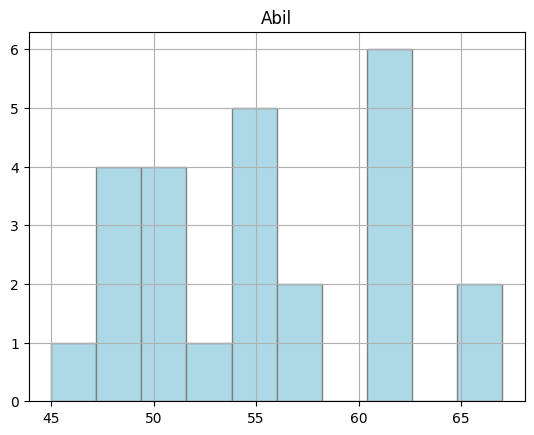

In [6]:
# Q1c (code):
# Check data distribution

# checking the distribution of the variable Reading Ability: 'Abil' visually through a histogram 
df_mh.hist('Abil', color = 'lightblue', ec = 'grey')

At first glance, the data does not seem very normally distributed, but we can check through the Shapiro-Wilk test. 

In [7]:
score_shapiro_abil, p_val_shapiro_abil = stats.shapiro(df_mh['Abil'])

if p_val_shapiro_abil < 0.05:
    print("Shapiro-Wilkes's test is significant- not normal distribution")
else:
    print("Shapiro-Wilkes's test is not significant - normally distributed")

Shapiro-Wilkes's test is not significant - normally distributed


However, after running the Shapiro-Wilk test which tests for normal distribution, we find that the test is not significant so the data is normally distributed. 

## Now we can move onto checking the IQ variable

array([[<Axes: title={'center': 'IQ'}>]], dtype=object)

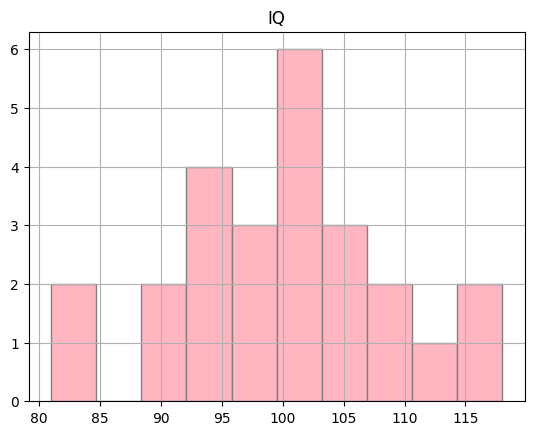

In [8]:
# checking the distribution of the variable 'IQ' visually through a histogram 
df_mh.hist('IQ', color = 'lightpink', ec = 'grey')

On first glance, this data seems normally distributed, but we will still check using the Shapiro-Wilk test. 

In [9]:
score_shapiro_iq, p_val_shapiro_iq = stats.shapiro(df_mh['IQ'])

if p_val_shapiro_iq < 0.05:
    print("Shapiro-Wilkes's test is significant- not normal distribution")
else:
    print("Shapiro-Wilkes's test is not significant - normally distributed")

Shapiro-Wilkes's test is not significant - normally distributed


As both of these variables are normally distributed, we can continue with the analysis. 

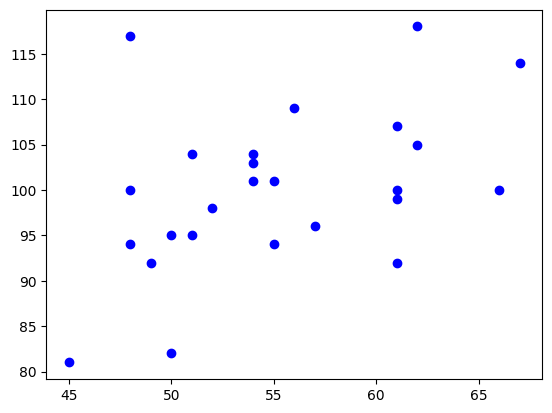

In [10]:
# Q1d (code):
# Scatter plot 

#Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

x = df_mh['Abil']
y = df_mh['IQ']

plt.scatter(x, y, color = 'blue')
plt.show()


<Axes: xlabel='Abil', ylabel='IQ'>

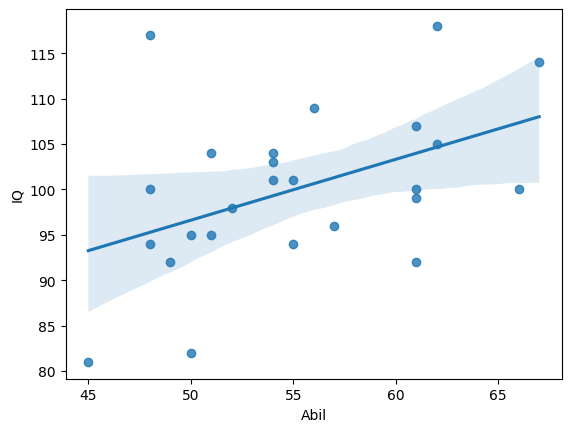

In [11]:
# Q1e (code):
# Correlation line
sns.regplot(data=df_mh, x="Abil", y="IQ")

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

## Q2a (answer with words):
We should use the Pearson because the data is from an interval scale (IQ and Reading Ability) and not ordinal data, which is more appropriate for the Spearman. Additionally, there seems to be a linear relationship which also is best tested with the Pearson coefficient. 

In [12]:
# Q2b (code):
# create two data series to use for our correlation test 

iq_srs = df_mh['IQ'].squeeze()
ability_srs = df_mh['Abil'].squeeze()

corr = pg.corr(iq_srs, ability_srs)
print(corr)



          n        r         CI95%     p-val   BF10     power
pearson  25  0.45117  [0.07, 0.72]  0.023593  2.804  0.640299


# Q2c (answer with words):
The p-value from the Pearson test is 0.0235, which is less than 0.05, meaning there is strong significance in the test. The r value is 0.45117, which means there is a slight positive correlation between iq and reading ability. 

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

# Q3a (answer in words):
 H0: There will be no difference in reading time at home between the groups with high reading ability and low reading ability. 
 H1：There will be a significant difference in reading time between those with high reading ability and those with low.

In [13]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for dataframes
from scipy.stats import chi2_contingency ##used for statistical testing
import numpy as np
# Define the rounded average for Reading Ability

abil_mean = df_mh["Abil"].mean()
print(abil_mean)

55.12


In [14]:
# Define the rounded average for Home 
home_mean = df_mh["Home"].mean()
print(home_mean)

124.0


In [15]:
# Create the Rank_Abil column
df_mh['Rank_Abil'] = ['high' if x > abil_mean else 'low' for x in df_mh['Abil']]


In [16]:
# Create the Rank_Home column
df_mh['Rank_Home'] = ['frequent' if x > home_mean else 'infrequent' for x in df_mh['Home']]
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,high,frequent
1,2,56,109,123,608,high,infrequent
2,3,45,81,108,640,low,infrequent
3,4,66,100,155,493,high,frequent
4,5,49,92,103,636,low,infrequent


In [17]:
# Q3c (code):
# Construct Contingency Matrix

#getting only the participants who scored low reading ability
lowAbil = df_mh.loc[df_mh["Rank_Abil"] == 'low']

#making two lists that split the low reading ability participants into their reading categories
lowAbil_frequentHome = lowAbil.loc[lowAbil["Rank_Home"] == 'frequent']
lowAbil_infrequentHome = lowAbil.loc[lowAbil["Rank_Home"] == 'infrequent']



In [18]:
# do the same thing but with high reading ability to be able to fill the contingency table

highAbil = df_mh.loc[df_mh["Rank_Abil"] == 'high']

highAbil_frequentHome = highAbil.loc[highAbil["Rank_Home"] == 'frequent']
highAbil_infrequentHome = highAbil.loc[highAbil["Rank_Home"] == 'infrequent']


In [19]:
data4contingency = []
data4contingency.append(len(lowAbil_frequentHome))
data4contingency.append(len(lowAbil_infrequentHome))
data4contingency.append(len(highAbil_frequentHome))
data4contingency.append(len(highAbil_infrequentHome))

print('The values:')
print(data4contingency)


# We transform the list in a contingency matrix
data_cm = np.array(data4contingency).reshape(2,-1)

print('The contingency matrix')
print(data_cm)

The values:
[3, 12, 8, 2]
The contingency matrix
[[ 3 12]
 [ 8  2]]


In [20]:
# Q3d (code):
# Perform the Chi-square test

chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(data_cm)
print(chi2, p_value)
print('These are the expected frequencies')
print(expected_frequencies)

if p_value < 0.05:
    print("The observed differences are statiscally significant - H0 is rejected")
else:
    print("The observed differences are not statiscally significant - H1 is rejected")

6.500270562770561 0.010785807794066234
These are the expected frequencies
[[6.6 8.4]
 [4.4 5.6]]
The observed differences are statiscally significant - H0 is rejected


# Q3e (answer in words):
Because the p-value is 0.01079, which is less than 0.05, the result of the test is statistically significant. Therefore, we can reject the null hypothesis that there will be no difference between reading ability and frequency of reading at home. There seems to be a difference between those with higher reading abilities and frequency of reading at home, and based on this it seems that those who spend more time reading at home will also likely have a higher reading ability. 

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [21]:

import pandas as pd # used for dataframes and working iwht the data
from scipy import stats #used for statsitcal testing
import numpy as np #used for statsitical testing and correlations
import matplotlib.pyplot as plt ## used for plotting and visualizations
import seaborn as sns #used for plotting and visualizations

# Load the data
df_evaluators = pd.read_csv('data/evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [22]:
# Q4a (code):
# Calculate mean and standard deviation for age
df_evaluators['age'].describe()

count    34.000000
mean     30.852941
std       6.238358
min      23.000000
25%      27.000000
50%      29.000000
75%      32.750000
max      48.000000
Name: age, dtype: float64

Based on this result, the mean age is 30.853 with a standard deviation of 6.238.

In [23]:
# Q4b (code)
# Count male and female evaluators
#creating two data frames based on gender
male = df_evaluators.loc[df_evaluators['sex'] == 1]
female = df_evaluators.loc[df_evaluators['sex'] == 2]
# In the 'sex' column: 1 represents males and 2 represents females

# count the length of the data frame to count the female evaluators
len(female)

30

In [24]:
# count the length of the data frame to count the male evaluators
len(male)

4

Based on the lengths of the resulting dataframes, there are 30 women evaluators and 4 men. 

### Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [25]:
# Load ratings data
df_ratings = pd.read_csv('data/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [26]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
categories = ['thoughful', 'competent', 'intelligent']
#selecting the rows based on only the rating categories needed 
filter_df = df_ratings[df_ratings['Category'].isin(categories)]

In [27]:
# Calculate the mean intellect rating for each evaluator
intellect_mean = filter_df[filter_df['Category'] == 'intelligent']
intellect_mean["Rating"].mean()

4.487179487179487

In [28]:
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_mean.groupby('eval_id').agg({'Rating': 'mean'}).reset_index()
intellect_mean.head()

,eval_id,Rating
0,1,6.0
1,2,5.0
2,3,5.0
3,4,5.0
4,5,0.0


In [29]:
# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect' 
intellect_mean.head()

,eval_id,Rating,Category
0,1,6.0,intellect
1,2,5.0,intellect
2,3,5.0,intellect
3,4,5.0,intellect
4,5,0.0,intellect


In [30]:
# Create a DataFrame for 'impression' and 'hire' ratings
rating = ['impression', 'hire']
other_ratings = df_ratings[df_ratings['Category'].isin(rating)]
other_ratings.head()

,eval_id,Category,Rating
3,1,impression,7.000000
4,1,hire,6.000000
8,2,impression,4.666667
9,2,hire,4.000000
13,3,impression,8.333333


In [31]:
# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)


In [32]:
# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators, how='inner', on='eval_id')
ratings2.head()

,eval_id,Rating,Category,condition,age,sex
0,1,6.000000,intellect,listened,29.0,2.0
1,1,7.000000,impression,listened,29.0,2.0
2,1,6.000000,hire,listened,29.0,2.0
3,2,5.000000,intellect,listened,27.0,2.0
4,2,4.666667,impression,listened,27.0,2.0


In [33]:
# Select only the necessary columns as per the structure required
#need eval_id, category, rating, condition
ratings2 = ratings2[['eval_id', 'Rating', 'condition', 'Category']]

In [34]:
# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

In [35]:
# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Rating,condition,Category
2,1,6.000000,listened,hire
1,1,7.000000,listened,impression
0,1,6.000000,listened,intellect
5,2,4.000000,listened,hire
4,2,4.666667,listened,impression


## Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



# Q6a (answer in words):
# Null hypothesis:
There is no significant difference between overall ratings on the hire/impression/intellect scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2).

# Alternative hypothesis:
There will be a significant difference between overall ratings on the hire/impression/intellect scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explain why.
We will do a two-tailed test because the test is undirectional-- so we are examing if it is a higher or a lower rating, not one or the other. 

# Q6c (answer in words):
# What are the independent variable and the dependent variable here?
The independent variable is the condition (read or listen) and the dependent variable is the rating. 


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [36]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu # used for statistical testing 


# Descriptive analysis of the ratings
sub_df = ratings2.groupby("Category").agg({'Rating' : ['mean', 'min', 'max']})
print(sub_df)

              Rating                    
                mean       min       max
Category                                
hire        3.871795  0.000000  8.000000
impression  5.094017  0.333333  8.666667
intellect   4.487179  0.000000  9.000000


In [37]:
# Test for normal distribution (Shapiro-Wilk test)

In [38]:
shapiro_results = {}

for category in ratings2['Category'].unique():
    category_ratings = ratings2[ratings2['Category'] == category]['Rating']
    score_shapiro, p_val_shapiro = shapiro(category_ratings)
    shapiro_results[category] = p_val_shapiro
print(shapiro_results)

{'hire': 0.04710446957162048, 'impression': 0.17238601967726547, 'intellect': 0.017098656163680163}


Because the Shapiro-Wilk test was significant for the hire and the intellect groups (p-val < 0.05), we cannot continue with a parametric t-test, but we should proceed with the Mann-Whitney U test. However, we can use the parametric t-test for the impression group. 

Now, we can continue to test for the homogeneity of variances between the listened and the read categories. 

In [39]:
# Test for homogeneity of variances (Levene's test)

score, p_val = stats.levene(ratings2[ratings2['condition'] == 'listened']['Rating'],
                            ratings2[ratings2['condition'] == 'read']['Rating'])
if p_val < 0.05:
    print("Levene's test is significant - use Welch's test")
else:
    print("Levene's test is not significant - proceed")

Levene's test is not significant - proceed


Because the Levene's test was not significant, we can proceed and the homogeneity of variance is verified

Lets begin with the T-test for the impression group. 

In [40]:
# Independent t-tests
#first we need to isolate each group to run the tests
sub_df = ratings2.groupby('Category')
impression = sub_df.get_group('impression')
intellect = sub_df.get_group('intellect')
hire = sub_df.get_group('hire')

hire.head()

,eval_id,Rating,condition,Category
2,1,6.0,listened,hire
5,2,4.0,listened,hire
8,3,5.0,listened,hire
11,4,4.0,read,hire
14,5,1.0,read,hire


In [41]:
intellect.head()

,eval_id,Rating,condition,Category
0,1,6.0,listened,intellect
3,2,5.0,listened,intellect
6,3,5.0,listened,intellect
9,4,5.0,read,intellect
12,5,0.0,read,intellect


In [42]:
impression.head()

,eval_id,Rating,condition,Category
1,1,7.000000,listened,impression
4,2,4.666667,listened,impression
7,3,8.333333,listened,impression
10,4,4.666667,read,impression
13,5,1.333333,read,impression


In [43]:
ttest_score, p_val = stats.ttest_ind(impression['condition'] == 'listened', impression['condition'] == 'read')
if p_val < 0.05:
    print("Difference is statistically significant - reject H0, confirm H1")
else:
    print("Difference is NOT statistically significant - reject H1, confirm H0")

print(p_val)

Difference is NOT statistically significant - reject H1, confirm H0
0.5032463231795226


Now, we can move on to the Mann-Whitney U tests for intellect and hire categories. 

In [47]:
intellect_statistic, intellect_p_val = mannwhitneyu(intellect['condition'] == 'listened', intellect['condition'] == 'read')
print(intellect_statistic, intellect_p_val)

819.0 0.5033500136404941


In [48]:
hire_statistic, hire_p_val = mannwhitneyu(hire['condition'] == 'listened', hire['condition'] == 'read')
print(hire_statistic, hire_p_val)

819.0 0.5033500136404941


#Q7b (answer in words):
Based on the p-vals of our tests (p-val > 0.05), we would reject the null hypothesis and accept the null hypothesis that there is nosignificant difference between overall ratings on the hire/impression/intellect scale between evaluators who listened to resume pitches and evaluators who read the resume pitches. While we were able to complete the independent two-tailed t-test for the impression category, the Shapiro-Wilk test indicated that this would not be appropriate for the intellect and hire categories because the Shapiro-Wilk test p-val was < 0.5. Therefore, we conducted the Mann-Whitney U test and found no significant p-value. 